In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [3]:
housing_data = pd.read_csv('AmesHousing.tsv', delimiter='\t')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
def transform_features(df):
 
    return df
#train.columns

In [5]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [6]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    lr = LinearRegression()
    numeric_feature = df.select_dtypes(include=['float','int']).columns.drop('SalePrice')
    lr.fit(train[numeric_feature], train['SalePrice'])
    test_predict = lr.predict(test[numeric_feature])
    test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_predict))
    return test_rmse

#first_data = transform_features(housing_data)
first_trial = select_features(housing_data)
train_and_test(first_trial)

57088.25161263909

## FEATURE ENGINEERING

In [7]:
def transform_features(df):
    
    #filtering to select feature with less than 25% null values
    df_null_value = df.isnull().sum()
    df_col_filter = df_null_value[df_null_value<732]
    df_col_select = df[df_col_filter.index]
    return df_col_select

In [8]:
def select_features(df,target):
    numeric = df.select_dtypes(include=['float64','int64']).columns.drop(target)
    return numeric

In [9]:
#filtered the dataframeto select featured with null values less 
#than 5%
filtered_column = transform_features(housing_data)
null_value = filtered_column.isnull().sum()
col_less_than_5 = filtered_column[null_value[null_value<146].index]

#filtered the dataframe to select numeric features with null values
#less than 5%
numeric_less_than_5 = select_features(col_less_than_5, 'SalePrice')

#print(col_less_than_5.shape[1])
#print(numeric_less_than_5)
#print(col_less_than_5[numeric_less_than_5].isnull().sum().value_counts())

#going to fill numeric_less_than_5 variable null with mode of column
col_less_than_5[numeric_less_than_5] = col_less_than_5[numeric_less_than_5].fillna(value=col_less_than_5[numeric_less_than_5].mode().iloc[0])
print(col_less_than_5[numeric_less_than_5].columns)
print(col_less_than_5[numeric_less_than_5].isnull().sum().value_counts())
#going to create some new features

#create years_until_remod feature
col_less_than_5['Years Since Remod'] = col_less_than_5['Yr Sold'] - col_less_than_5['Year Remod/Add']
col_less_than_5['House Age'] = col_less_than_5['Yr Sold'] - col_less_than_5['Year Built']

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'],
      dtype='object')
0    36
dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
#columns that ain't useful for ml are order and pid, nothing is said
#about the in the documentatio
col_less_than_5 = col_less_than_5.drop(['Order', 'PID'],axis=1)

#columns that leak data are columns that describe the target columns
#which in this case are mo sold, yr sold, sale type and sale condition
col_less_than_5 = col_less_than_5.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'],axis=1)
col_less_than_5.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed 

In [11]:
#checking for outliers in 'years_until_remod' 'Year Remod/Add' 
#and 'Year Built'
years = col_less_than_5['Years Since Remod']
years[years<0]#checking for values less than 0

1702   -1
2180   -2
2181   -1
Name: Years Since Remod, dtype: int64

In [12]:
age = col_less_than_5['House Age']
age[age<0]

2180   -1
Name: House Age, dtype: int64

In [13]:
#removing outliers
col_less_than_5 = col_less_than_5.drop([1702,2180,2181],axis=0)

### Updating the functions

In [14]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def select_numeric(df):
    numeric = df.select_dtypes(include=['float64','int64']).columns
    return numeric

In [15]:
def transform_features(df):
    
    #filtering to select feature with less than 25% null values
    df_null_value = df.isnull().sum()
    df_col_filter = df_null_value[df_null_value<733]
    df_less_than_25 = df[df_col_filter.index]
    
    #filtered the dataframeto select featured with null values 
    #less than 5%
    null_value = df_less_than_25.isnull().sum()
    df_less_than_5 = df_less_than_25[null_value[null_value<147].index]
    
    #return numeric features indices(index) with null values less than 5%
    numeric_less_than_5 = select_numeric(df_less_than_5)
    
    #going to fill numeric_less_than_5 variable null with mode of 
    #column
    df_less_than_5 = df_less_than_5.fillna(df_less_than_5[numeric_less_than_5].mode().iloc[0])
    #going to create some new features

    #create years_until_remod feature
    df_less_than_5['Years Since Remod'] = df_less_than_5['Yr Sold'] - df_less_than_5['Year Remod/Add']
    
    #create the house age feature
    df_less_than_5['House Age'] = df_less_than_5['Yr Sold'] - df_less_than_5['Year Built']
    
    #dropping some columns

    #columns that ain't useful for ml are order and pid, nothing 
    #is said about the in the documentation
    df_less_than_5 = df_less_than_5.drop(['Order', 'PID'],axis=1)
    
    #columns that leak data are columns that describe the target 
    #columns which in this case are mo sold, yr sold, 
    #sale type and sale condition
    df_less_than_5 = df_less_than_5.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'],axis=1)
    
    #removing outliers
    df_less_than_5 = df_less_than_5.drop([1702,2180,2181],axis=0)
    
    return df_less_than_5

In [16]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    lr = LinearRegression()
    numeric_feature = df.select_dtypes(include=['float','int']).columns.drop('SalePrice')
    lr.fit(train[numeric_feature], train['SalePrice'])
    test_predict = lr.predict(test[numeric_feature])
    test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_predict))
    return test_rmse

second_data = transform_features(housing_data)
second_trial = select_features(second_data)
train_and_test(second_trial)

55275.36731241307

## FEATURE SELECTION

In [17]:
#calling the features we're working with
transform_df = transform_features(housing_data)

#choosing the numeric features:
numeric_index = select_numeric(transform_df)
numeric_features = transform_df[numeric_index]

#creating a correlation matrix of the features with the target column, SalePrice
abs_corr_matrix = numeric_features.corr().abs()['SalePrice'].sort_values()
abs_corr_matrix
#numeric_features.isnull().sum()

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Year Remod/Add       0.533007
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
House Age            0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qu

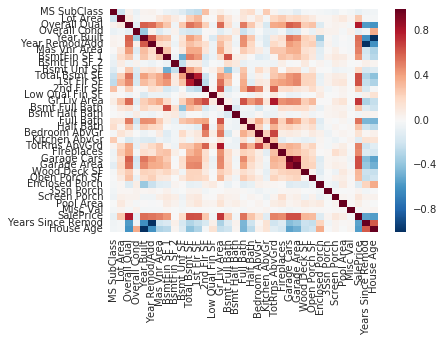

In [18]:
%matplotlib inline

corr_matrix = transform_df[numeric_index].corr()

sns.heatmap(corr_matrix)
#this is too much for heatmap

In [19]:
#selecting columns with correlation coefficients larger than 0.3
#testing for it's validation
numeric_feature_one = numeric_features[abs_corr_matrix[abs_corr_matrix>0.3].index]
#fes = select_features(numeric_feature_one)
train_and_test(numeric_feature_one)

36612.28397462025

In [20]:
#selecting columns with correlation coefficients larger than 0.4
#testing for it's validation
numeric_feature_two = numeric_features[abs_corr_matrix[abs_corr_matrix>0.4].index]
#fes_one = select_features(numeric_feature_two)
train_and_test(numeric_feature_two)

36626.12481908985

Thankfully we have a function train_and_test() that makes it easy to calculate the validation of our model. Since coefficient larger than 0.3 is more accurate, we are going to filter by this

In [21]:
#selecting column coefficients larger than 0.3
numeric_features= numeric_features[abs_corr_matrix[abs_corr_matrix>0.3].index]
numeric_features.columns

Index(['Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Year Remod/Add', 'Years Since Remod',
       'Full Bath', 'Year Built', 'House Age', '1st Flr SF', 'Garage Area',
       'Total Bsmt SF', 'Garage Cars', 'Gr Liv Area', 'Overall Qual',
       'SalePrice'],
      dtype='object')

In [22]:
#dropping numeric features less than 0.3 in the main feature dataframe
transform_df = transform_df.drop(abs_corr_matrix[abs_corr_matrix<0.3].index, axis=1)

In [23]:
#inspecting the columns
transform_df.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'Years Since Remod',
       'House Age'],
      dtype='object')

In [24]:
#From the documentation, these columns should be seen as norminal categorical:
nominal_features = [
    'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 
    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
    'Foundation', 'Heating', 'Central Air']


In [25]:
#from the documentation, these columns should be seen as ordinal categorical:
ordinal_features = [
    'Lot Shape','Utilities', 'Land Slope', 'Exter Qual','Exter Cond', 
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2',
    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Paved Drive',
    'Overall Qual', 'SalePrice'
]

In [26]:
numerical_features = [
    'Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
    'TotRms AbvGrd', 'Mas Vnr Area', 'Year Remod/Add', 'Years Since Remod',
    'Full Bath', 'Year Built', 'House Age', '1st Flr SF', 'Garage Area',
    'Total Bsmt SF', 'Garage Cars', 'Gr Liv Area', 'Overall Qual', 'SalePrice'
]

From the list of norminal features, columns have too many unique values will be dropped. This is because too many unique values would return a lot of dummy values

In [27]:
#find the number unique values of each column
unique_length = transform_df[nominal_features].apply(lambda col: len(col.value_counts())).sort_values()
large_unique = unique_length[unique_length>10].index

#updating nominal_features
nominal_features = [col for col in nominal_features if col not in large_unique]
print(len(nominal_features))

#dropping the features with large unique values
transform_df = transform_df.drop(large_unique, axis=1)

transform_df.shape[1]

14


47

We're also going to drop categorical features with low variance: i.e most of 
it's values belong to a specific category:

In [28]:
#creating a Series of nominal_features value_counts
col_variance = transform_df[nominal_features].apply(lambda col: col.value_counts(normalize=True).to_dict())
print(type(col_variance))

#filtering columns that have 0.95 of its items in one unique value
low_var_col = []
for k,v in col_variance.iteritems():
    for keys, values in v.items():
        if values > 0.95:
            low_var_col.append(k)

#dropping items in low_var_col transform_df
transform_df = transform_df.drop(low_var_col, axis=1)

#updating nominal_features
nominal_features = [col for col in nominal_features if col not in low_var_col]

<class 'pandas.core.series.Series'>


In [29]:
#checking if it's updated
print(transform_df.shape[1])
len(nominal_features)

43


10

Checking through the numerical_features to find if there's anyone that should be categorical instead<br>
There isn't any!!!!<br>
Now, use heatmap to check for collinearity between numerical features<br>

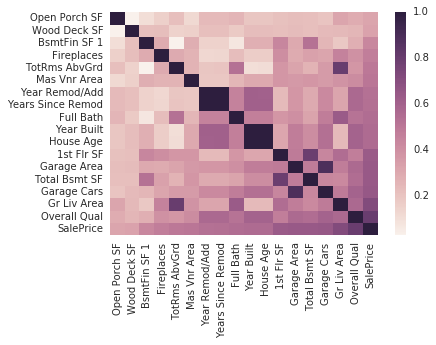

In [30]:
%matplotlib inline

num_corr = transform_df[numerical_features].corr().abs()
sns.heatmap(num_corr)

These are the pairs with high collinearity<br>
Gr Liv Area and TotRms AbvGrd<br>
Year Remod/Add and Years Since Remod<br>
Year Built and House Age<br>
Garage Area and Garage Cars<br>
Total Bsmt SF and 1st Flr SF<br>

Based on documentation and research on their relevance, I'm going to drop the following:<br>
TotRms AbvGrd-it's discrete, Gr Liv Area would provide me with a better information since it is continous<br>
Year Remod/Add-It doesn't provide information about the house unlike Years Since Remod<br>
Year Built-It doesn't provide information about the house unlike House Age<br>
Garage Cars-it's discrete, Garage Area would provide me with a better information since it is continous<br>
1st Flr SF-I'm conflicted to whether I should pick it or drop it so, I'm going to just run test on it<br>

In [31]:
col_drop_1 = ['TotRms AbvGrd', 'Year Remod/Add', 'Year Built', 'Garage Cars', '1st Flr SF']
col_drop_2 = ['TotRms AbvGrd', 'Year Remod/Add', 'Year Built', 'Garage Cars']

num_1 = [col for col in numerical_features if col not in col_drop_1]
num_2 = [col for col in numerical_features if col not in col_drop_2]

In [32]:
#if I exclude 1st Flr SF
print(train_and_test(transform_df[num_1]))

#if I include 1st Flr SF
print(train_and_test(transform_df[num_2]))

36734.34310657303
36591.01157256019


In [33]:
#Since the model is more accurate if I include 1st Flr SF, 
#I'm going to do just that
numerical_features = num_2

#to confirm it's been dropped
print(len(numerical_features))

#dropping these values from our dataframe
transform_df = transform_df.drop(col_drop_2, axis=1)

#to confirm it's been dropped
print(transform_df.shape[1])

14
39


I'm going to convert ordinal categorical values to int(numerical) values

In [34]:
transform_df['Lot Shape'].value_counts()

Reg    1859
IR1     976
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

In [35]:
transform_df['Lot Shape'] = transform_df['Lot Shape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3': 1})

In [36]:
transform_df['Utilities'].value_counts()

AllPub    2924
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [37]:
transform_df['Utilities'] = transform_df['Utilities'].map({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})

In [38]:
transform_df['Land Slope'].value_counts()

Gtl    2786
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [39]:
transform_df['Land Slope'] = transform_df['Land Slope'].map({'Gtl':3,'Mod':2,'Sev':1})

In [40]:
transform_df['Exter Qual'].value_counts()

TA    1799
Gd     988
Ex     105
Fa      35
Name: Exter Qual, dtype: int64

In [41]:
transform_df['Exter Cond'].value_counts()

TA    2546
Gd     299
Fa      67
Ex      12
Po       3
Name: Exter Cond, dtype: int64

In [42]:
transform_df['Heating QC'].value_counts()

Ex    1492
TA     864
Gd     476
Fa      92
Po       3
Name: Heating QC, dtype: int64

In [43]:
transform_df['Kitchen Qual'].value_counts()

TA    1494
Gd    1159
Ex     203
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

In [44]:
transform_df['Bsmt Qual'].value_counts()

TA    1283
Gd    1218
Ex     256
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [45]:
transform_df['Bsmt Cond'].value_counts()

TA    2613
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [46]:
for col in ['Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual', 'Bsmt Qual', 'Bsmt Cond']:
    transform_df[col] = transform_df[col].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [47]:
transform_df['Bsmt Exposure'].value_counts()

No    1905
Av     418
Gd     282
Mn     239
Name: Bsmt Exposure, dtype: int64

In [48]:
transform_df['Bsmt Exposure'] = transform_df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'NA':-1})

In [49]:
transform_df['BsmtFin Type 1'].value_counts()

GLQ    857
Unf    850
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64

In [50]:
transform_df['BsmtFin Type 2'].value_counts()

Unf    2496
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

In [51]:
for col in ['BsmtFin Type 1', 'BsmtFin Type 2']:
    transform_df[col] = transform_df[col].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

In [52]:
transform_df['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', nan, 'Mix'], dtype=object)

In [53]:
transform_df['Electrical'] = transform_df['Electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1,'Mix':1.5})

In [54]:
transform_df['Functional'].unique()

array(['Typ', 'Mod', 'Min1', 'Min2', 'Maj1', 'Maj2', 'Sev', 'Sal'],
      dtype=object)

In [55]:
transform_df['Functional'] = transform_df['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})

In [56]:
transform_df['Paved Drive'].unique()

array(['P', 'Y', 'N'], dtype=object)

In [57]:
transform_df['Paved Drive'] = transform_df['Paved Drive'].map({'Y':3,'P':2, 'N':1})

In [58]:
#filled missing values in ordinal_features with 0
transform_df[ordinal_features] = transform_df[ordinal_features].fillna(0)

In [59]:
#confirmed ordinal_features has no nan
transform_df[ordinal_features].isnull().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplaces        0
Paved Drive       0
Overall Qual      0
SalePrice         0
dtype: int64

In [60]:
#converting ordinal_features to int
for col in ordinal_features:
    transform_df[col] = transform_df[col].astype(int)

Check for correlation between ordinal and targert<br>
Iterate once more and check for the best corr to cut off<br>

In [61]:
ordinal_corr = transform_df[ordinal_features].corr().abs()['SalePrice'].sort_values()
ordinal_corr

BsmtFin Type 2    0.011878
Exter Cond        0.021902
Utilities         0.026025
Land Slope        0.066488
Functional        0.121769
Bsmt Cond         0.212062
Electrical        0.229733
Paved Drive       0.275909
Lot Shape         0.291246
BsmtFin Type 1    0.337634
Bsmt Exposure     0.400698
Heating QC        0.450255
Fireplaces        0.474831
Bsmt Qual         0.608011
Kitchen Qual      0.673934
Exter Qual        0.699605
Overall Qual      0.801206
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [62]:
#testing for accuracy of model with features of correlation>0.4
train_and_test(transform_df[ordinal_corr[ordinal_corr>0.4].index])

43477.28659030271

In [63]:
#testing for accuracy of model with features of correlation>0.3
train_and_test(transform_df[ordinal_corr[ordinal_corr>0.3].index])

43338.25952909067

In [64]:
#testing for accuracy of model with features of correlation>0.2
train_and_test(transform_df[ordinal_corr[ordinal_corr>0.2].index])

42813.46041013308

In [65]:
#testing for accuracy of model with features of correlation>0.5
train_and_test(transform_df[ordinal_corr[ordinal_corr>0.5].index])

46648.11137350673

In [66]:
#testing for accuracy of model with features of correlation>0.1
train_and_test(transform_df[ordinal_corr[ordinal_corr>0.1].index])

42831.467724807524

In [67]:
#from our test, it's best if we cut off from 0.2
cut_off = ordinal_corr[ordinal_corr<0.2].index

#updating our ordinal_features
ordinal_features = [col for col in ordinal_features if col not in cut_off]

#updating the transform_df
transform_df = transform_df.drop(cut_off, axis=1)

#confirming it is updated
transform_df.shape[1]

34

In [68]:
#confirming ordinal_features is updated
len(ordinal_features)

13

Use heatmap to check for collinearity between ordinal features<br>

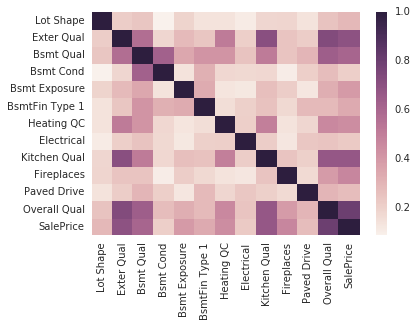

In [69]:
%matplotlib inline

corrs = transform_df[ordinal_features].corr().abs()
sns.heatmap(corrs)

These are the ones that seem to have collinearity:<br>
Exter Qual vs Overall Qual<br>
Exter Qual vs Kitchen Qual<br>
Overall Qual vs Kitchen Qual<br>
Since it's just these three, I'm going to check for the model accuracy if each is removed:<br>

In [70]:
num = [lis for lis in ordinal_features if lis != 'Exter Qual']
num1 = [lis for lis in ordinal_features if lis != 'Overall Qual']
num2 = [lis for lis in ordinal_features if lis != 'Kitchen Qual']
print(train_and_test(transform_df[num]))
print(train_and_test(transform_df[num1]))
print(train_and_test(transform_df[num2]))
print(train_and_test(transform_df[ordinal_features]))

43087.65961576384
47236.405201182766
43547.09319386525
42813.46041013308


Since the having all the features improves accuracy of the model. I'm going to leave it as that

Add ordinal to numerical features list<br>

In [71]:
numerical_features.extend(ordinal_features)
print(len(numerical_features))

27


In [72]:
print(numerical_features)

['Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces', 'Mas Vnr Area', 'Years Since Remod', 'Full Bath', 'House Age', '1st Flr SF', 'Garage Area', 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual', 'SalePrice', 'Lot Shape', 'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Fireplaces', 'Paved Drive', 'Overall Qual', 'SalePrice']


In [73]:
numerical_features = list(set(numerical_features))

In [74]:
print(len(numerical_features))

24


Convert nominal_features to categorical

In [75]:
for col in nominal_features:
    transform_df[col] = transform_df[col].astype('category')

Convert nominal_features to dummies

In [76]:
for col in nominal_features:
    nominal_dummies = pd.get_dummies(transform_df[col])
    transform_df = pd.concat([transform_df, nominal_dummies], axis=1)
    del transform_df[col]

In [84]:
transform_df.isnull().sum().sum()

0

### Updating the functions:

In [77]:
def transform_features(df):
    
    #filtering to select feature with less than 25% null values
    df_null_value = df.isnull().sum()
    df_col_filter = df_null_value[df_null_value<733]
    df_less_than_25 = df[df_col_filter.index]
    
    #filtered the dataframeto select featured with null values 
    #less than 5%
    null_value = df_less_than_25.isnull().sum()
    df_less_than_5 = df_less_than_25[null_value[null_value<147].index]
    
    #return numeric features indices(index) with null values less than 5%
    numeric_less_than_5 = select_numeric(df_less_than_5)
    
    #going to fill numeric_less_than_5 variable null with mode of 
    #column
    df_less_than_5 = df_less_than_5.fillna(df_less_than_5[numeric_less_than_5].mode().iloc[0])
    #going to create some new features

    #create years_until_remod feature
    df_less_than_5['Years Since Remod'] = df_less_than_5['Yr Sold'] - df_less_than_5['Year Remod/Add']
    
    #create the house age feature
    df_less_than_5['House Age'] = df_less_than_5['Yr Sold'] - df_less_than_5['Year Built']
    
    #dropping some columns

    #columns that ain't useful for ml are order and pid, nothing 
    #is said about the in the documentation
    df_less_than_5 = df_less_than_5.drop(['Order', 'PID'],axis=1)
    
    #columns that leak data are columns that describe the target 
    #columns which in this case are mo sold, yr sold, 
    #sale type and sale condition
    df_less_than_5 = df_less_than_5.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'],axis=1)
    
    #removing outliers
    df_less_than_5 = df_less_than_5.drop([1702,2180,2181],axis=0)
    
    return df_less_than_5

In [86]:
def select_features(df,num_coef_threshold=0.3,unique_threshold=10,var_threshold=0.95,ord_coef_threshold=0.2):
    
    
    #calling the features we're working with
    transform_df = transform_features(df)

    #choosing the numeric features:
    numeric_index = select_numeric(transform_df)
    numeric_features = transform_df[numeric_index]

    #creating a correlation matrix of the features with the target column, SalePrice
    abs_corr_matrix = numeric_features.corr().abs()['SalePrice'].sort_values()

    #selecting column coefficients larger than 0.3
    numeric_features= numeric_features[abs_corr_matrix[abs_corr_matrix>num_coef_threshold].index]

    #dropping numeric features less than 0.3 in the main feature dataframe
    transform_df = transform_df.drop(abs_corr_matrix[abs_corr_matrix<num_coef_threshold].index, axis=1)

    #From the documentation, these columns should be seen as norminal categorical:
    nominal_features = [
        'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 
        'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
        'Foundation', 'Heating', 'Central Air']

    #from the documentation, these columns should be seen as ordinal categorical:
    ordinal_features = [
        'Lot Shape','Utilities', 'Land Slope', 'Exter Qual','Exter Cond', 
        'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2',
        'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Paved Drive',
        'Overall Qual', 'SalePrice']

    #reselecting numerical_features
    numerical_features = [
        'Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
        'TotRms AbvGrd', 'Mas Vnr Area', 'Year Remod/Add', 'Years Since Remod',
        'Full Bath', 'Year Built', 'House Age', '1st Flr SF', 'Garage Area',
        'Total Bsmt SF', 'Garage Cars', 'Gr Liv Area', 'Overall Qual', 'SalePrice']

    #find the number unique values of each column of the nominal_features
    unique_length = transform_df[nominal_features].apply(lambda col: len(col.value_counts())).sort_values()
    
    #find columns with large unique values lengths i.e more than 10 unique values
    large_unique = unique_length[unique_length>unique_threshold].index

    #updating nominal_features to remove values with large unique values
    nominal_features = [col for col in nominal_features if col not in large_unique]

    #dropping the features with large unique values
    transform_df = transform_df.drop(large_unique, axis=1)

    #creating a Series of nominal_features value_counts
    col_variance = transform_df[nominal_features].apply(lambda col: col.value_counts(normalize=True).to_dict())

    #filtering columns that have 0.95 of its items in one unique value
    low_var_col = []
    for k,v in col_variance.iteritems():
        for keys, values in v.items():
            if values > var_threshold:
                low_var_col.append(k)

    #dropping items in low_var_col transform_df
    transform_df = transform_df.drop(low_var_col, axis=1)

    #updating nominal_features
    nominal_features = [col for col in nominal_features if col not in low_var_col]
    
    #checking for collinearity between numerical features
    
    #these are features to be dropped after checking for features collinearity
    col_drop_2 = ['TotRms AbvGrd', 'Year Remod/Add', 'Year Built', 'Garage Cars']
    
    #updating the numerical features
    numerical_features = [col for col in numerical_features if col not in col_drop_2]

    #dropping these values from our dataframe
    transform_df = transform_df.drop(col_drop_2, axis=1)

    #I'm going to convert ordinal categorical values to int(numerical) values
    transform_df['Lot Shape'] = transform_df['Lot Shape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3': 1})
    transform_df['Utilities'] = transform_df['Utilities'].map({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})
    transform_df['Land Slope'] = transform_df['Land Slope'].map({'Gtl':3,'Mod':2,'Sev':1})
    for col in ['Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual', 'Bsmt Qual', 'Bsmt Cond']:
        transform_df[col] = transform_df[col].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    transform_df['Bsmt Exposure'] = transform_df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'NA':-1})
    for col in ['BsmtFin Type 1', 'BsmtFin Type 2']:
        transform_df[col] = transform_df[col].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
    transform_df['Electrical'] = transform_df['Electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1,'Mix':1.5})
    transform_df['Functional'] = transform_df['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
    transform_df['Paved Drive'] = transform_df['Paved Drive'].map({'Y':3,'P':2, 'N':1})

    #filled missing values in ordinal categorical features with 0
    transform_df[ordinal_features] = transform_df[ordinal_features].fillna(0)

    #converting ordinal categorical features to int
    for col in ordinal_features:
        transform_df[col] = transform_df[col].astype(int)

    #Check for correlation between ordinal and targert and iterate to find the best corr to cut off
    ordinal_corr = transform_df[ordinal_features].corr().abs()['SalePrice'].sort_values()

    #from our test, it's best if we cut off from 0.2
    cut_off = ordinal_corr[ordinal_corr<ord_coef_threshold].index

    #updating our ordinal_features
    ordinal_features = [col for col in ordinal_features if col not in cut_off]

    #updating the transform_df
    transform_df = transform_df.drop(cut_off, axis=1)

    #Add ordinal to numerical features list
    numerical_features.extend(ordinal_features)
    numerical_features = list(set(numerical_features))

    #Convert nominal_features to categorical
    for col in nominal_features:
        transform_df[col] = transform_df[col].astype('category')
    
    #Convert nominal_features to dummies
    for col in nominal_features:
        nominal_dummies = pd.get_dummies(transform_df[col])
        transform_df = pd.concat([transform_df, nominal_dummies], axis=1)
        del transform_df[col]
    
    return transform_df

In [97]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    lr = LinearRegression()
    #numeric_feature = df.drop('SalePrice',axis=1).columns
    numeric_feature = df.select_dtypes(include=['float','int']).columns.drop('SalePrice')
    lr.fit(train[numeric_feature], train['SalePrice'])
    test_predict = lr.predict(test[numeric_feature])
    test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_predict))
    return test_rmse

#second_data = transform_features(housing_data)
#second_trial = select_features(second_data)
second_trial = select_features(housing_data)
train_and_test(second_trial)
#second_trial.isnull().sum().sum()

35146.36570876594

# TRAIN AND TEST

In [123]:
def train_and_test(df,k=0):
    lr = LinearRegression()
    numeric_feature = df.drop('SalePrice',axis=1).columns
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[numeric_feature], train['SalePrice'])
        test_predict = lr.predict(test[numeric_feature])
        test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_predict))
        return test_rmse
    
    if k == 1:
        #reshuffle rows of the dataframe
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        train_one = fold_one
        train_two = fold_two
        test_one = fold_two
        test_two = fold_one
        
        lr.fit(train_one[numeric_feature], train_one['SalePrice'])
        predictions_one = lr.predict(test_one[numeric_feature])
        rmse_one = np.sqrt(mean_squared_error(test_one['SalePrice'], predictions_one))
        
        lr.fit(train_two[numeric_feature], train_two['SalePrice'])
        predictions_two = lr.predict(test_two[numeric_feature])
        rmse_two = np.sqrt(mean_squared_error(test_two['SalePrice'], predictions_two))
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_value = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[numeric_feature], train['SalePrice'])
            predictions = lr.predict(test[numeric_feature])
            
            rmse = np.sqrt(mean_squared_error(test['SalePrice'], predictions))
            rmse_value.append(rmse)
        
        print(rmse_value)
        avg_rmse = np.mean(rmse_value)
        return avg_rmse
    
second_trial = select_features(housing_data)
train_and_test(second_trial,20)

[23056.397911234173, 31519.186741797203, 27210.077481852008, 36025.333204367074, 23855.878648848447, 31337.256531026687, 23218.069057055356, 21898.06183473445, 30212.51302717281, 23910.276170785048, 20935.807056918737, 33601.41292075995, 24431.331232761386, 61153.6865548315, 29967.830994199037, 21462.052134402875, 30853.612753445075, 26804.623507380966, 28775.14975332961, 24540.155458740446]


28738.43564878214